In [ ]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 37.7 MB/s eta 0:00:00


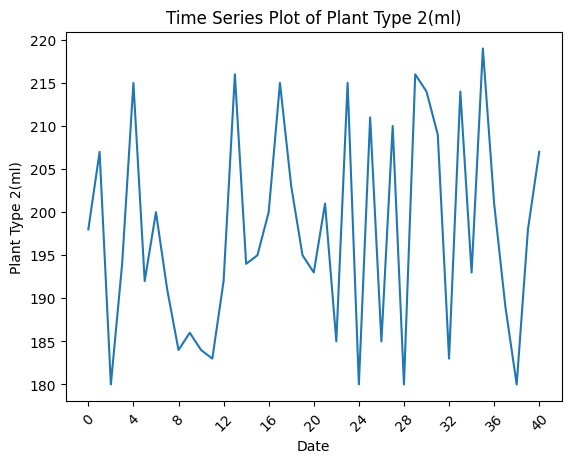

X.shape (31, 10) Y.shape (31,)
Epoch 1/80
1/1 [==============================] - 2s 2s/step - loss: 30490.8379 - val_loss: 775.2330
Epoch 2/80
1/1 [==============================] - 0s 75ms/step - loss: 731.3029 - val_loss: 19091.0801
Epoch 3/80
1/1 [==============================] - 0s 115ms/step - loss: 18122.1699 - val_loss: 17188.8516
Epoch 4/80
1/1 [==============================] - 0s 115ms/step - loss: 16312.3662 - val_loss: 4760.5488
Epoch 5/80
1/1 [==============================] - 0s 86ms/step - loss: 4499.5186 - val_loss: 403.0461
Epoch 6/80
1/1 [==============================] - 0s 104ms/step - loss: 403.8786 - val_loss: 5854.5215
Epoch 7/80
1/1 [==============================] - 0s 77ms/step - loss: 5659.1831 - val_loss: 10355.0059
Epoch 8/80
1/1 [==============================] - 0s 125ms/step - loss: 9975.9873 - val_loss: 8001.2646
Epoch 9/80
1/1 [==============================] - 0s 74ms/step - loss: 7718.5205 - val_loss: 2701.1633
Epoch 10/80
1/1 [=====================

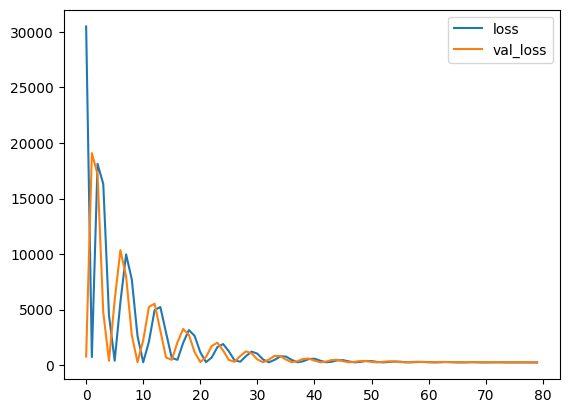

1/1 [==============================] - 0s 37ms/step


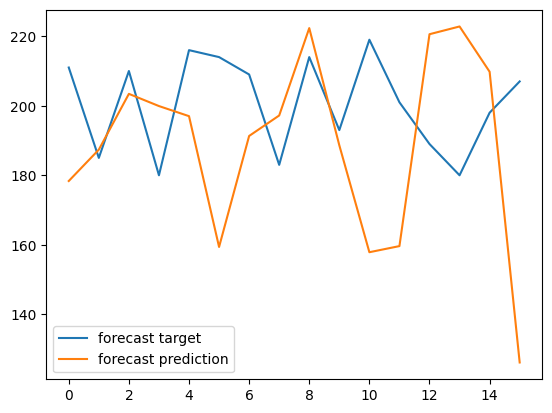

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load data from the text file
header = ['Date', 'Plant Type 1(ml)', 'Plant Type 2(ml)', 'Plant Type 3(ml)']
df = pd.read_csv('trainingData.csv', names=header, index_col=False)

# Convert 'Plant Type 2(ml)' column to numeric
df['Plant Type 2(ml)'] = pd.to_numeric(df['Plant Type 2(ml)'], errors='coerce')

# Drop rows with missing values, if any
df = df.dropna(subset=['Plant Type 2(ml)'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Assuming you want to predict 'plant_type1', adjust this accordingly
target_column = 'Plant Type 2(ml)'

# Create a time series dataset
series = df[target_column]

# Plot the original series
plt.plot(series)
plt.xlabel('Date')

n = len(series)
x_ticks_frequency = n // 10  # Adjust the frequency of ticks based on your preference
plt.xticks(range(0, n, x_ticks_frequency), df.index[::x_ticks_frequency], rotation=45)

plt.ylabel(target_column)
plt.title(f'Time Series Plot of {target_column}')
plt.show()

# Build the dataset for training
T = 10  # Number of past values to predict the next value
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

# Build the autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# Train the model
r = model.fit(
    X[:-N // 2], Y[:-N // 2],
    epochs=80,
    validation_data=(X[-N // 2:], Y[-N // 2:]),
)

# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Show the plots
plt.show()

# Forecast future values
validation_target = Y[-N // 2:]
validation_predictions = []

# First validation input
last_x = X[-N // 2]  # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0]  # 1x1 array -> scalar

    # Update the predictions list
    validation_predictions.append(p)

    # Make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

# Plot the forecast
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

# Show the plots
plt.show()
import tensorflow as tf
from tensorflowjs import converters

# Assuming 'model' is your Keras model
tfjs_path = 'path/to/local/directory'
converters.save_keras_model(model, tfjs_path)

In [ ]:
model.save('my_model.keras')